# Assignment 1

In [25]:
#github repo: https://github.com/Morell1123/Assignment1_SocialInformatics

## Part 1: Using web-scraping to gather data

We wish to find the list of researchers that have joined the most important scientific conference in Computational Social Science in 2019.

We find them by webscraping the programmes of the 2019 edition via the flowwing links:  
>Oral presentations: https://2019.ic2s2.org/oral-presentations/    
> Poster presentations: https://2019.ic2s2.org/posters/    

Summary:
>We found 888 unique researchers in 2019
>Explain one or two decisions you took during the web-scraping exercise, for 2019 or any other year. Why did you take this choice? How might your decision impact the final number of authors?
- We took the decision to include authors that was listed as "no presentation" since we figured that we were looking for who were social data scientists and thus a cancelled presenter would still be valid.
- Futheremore, we decided to do an error search for names longer than 25 characters which helped us find about 10-15 more authors who would have ha

In [1]:
from bs4 import BeautifulSoup ##A package to work with HTML data
import requests #A package to make HTTP requests
import re

In [2]:
#Part 1: webscraping
#Oral Presenters, setup link for html webscraping
LINK = "https://2019.ic2s2.org/oral-presentations/"
r_oral = requests.get(LINK)
soup_oral = BeautifulSoup(r_oral.content)

In [3]:
#Extract all oral presenters form url
data = soup_oral.findAll("p") #extract the part with the relevant data
presenters_all_topics = []
for topics in data[3:]: #loop over all the topic sections
    presenters = []
    for presentation in topics: #loop over each presentation in each topic
        try:
            presenters_NoClock = presentation.split(" – ")[2] #get the string of names after each time slot
            presenters.append(presenters_NoClock)
        except:
            pass
        
    prenters_topic = (", ".join([lecture.split(".")[0] for lecture in presenters])).replace("<","").replace("–","") #only include the names of the presenters and not the topic
    prenters_topic = prenters_topic.split(", ") #turn into single list with all the names in the rest of the lines
    presenters_all_topics.append(prenters_topic)
    oral_presenters_2019 = [item for sublist in presenters_all_topics for item in sublist]

In [4]:
#Poster Presenters
#Setup link for html webscraping
LINK = "https://2019.ic2s2.org/posters/"
r_poster = requests.get(LINK)
soup_post = BeautifulSoup(r_poster.content)

In [5]:
table = soup_post.find("div",{"class":"col-md-8 page-content-wrap"}) #Get the section that contains all the data. We call it a table

In [6]:
poster_researchers_all = []
for day in table.findAll("ul"): #loop over both days
    for poster in day.findAll("li"): #loop over each poster  presentation
        if str(poster)[:12] != "<li><strong>": #from each poster presentation extract only the names and not the topic
            poster_researh_grouped = str(poster).split("<span>")[0][4:].replace("</li>","") #reformat the names to fit in a single list and exclude commas and "and"
            poster_researchers = [item for sublist in [team.split(" and ") for team in poster_researh_grouped.split(", ")] for item in sublist]
            poster_researchers_all.extend(poster_researchers)

In [7]:
all_presenters = poster_researchers_all + oral_presenters_2019
all_presenters = list(set(poster_researchers_all + oral_presenters_2019))
for i,presenter in enumerate(all_presenters): #Some semi-manual error detection for names over a given lenght. Unhash to perform a few error corrections due to inconsistency in typing of the website
    if len(presenter) > 25:
        print(i,presenter)        

list_remove = ['Keyword-Based Procedure for Identifying Research-Relevant Text</strong>','Abhishek Samantray',
               'Massimo Riccaboni','(Moved to 3D Text Analysis) Ivan Smirnov','No presentation: Vincent Antonio Traag',
               'Christos Nicolaides,Luis Cueto-Felgueroso', 'No presentation: Eelke Heemskerk', 'No presentation (cancelled)',
               'No presentation: Youyou Wu','Abhishek Samantray,Massimo Riccaboni', 'Hartmut Wessler,Scott Althaus']
for i in range(5):
    for name in list_remove:
        try:
            all_presenters.remove(name)
        except:
            pass
all_presenters.extend(['Abhishek Samantray','Massimo Riccaboni'])
all_presenters.extend(['Ivan Smirnov','Vincent Antonio Traag'])
all_presenters.extend(['Christos Nicolaides','Luis Cueto-Felgueroso','Abhishek Samantray','Massimo Riccaboni'])
all_presenters.extend(['Eelke Heemskerk', 'Hartmut Wessler','Scott Althaus'])
all_presenters.extend(['Rens Wilderom'])
all_presenters.extend('Youyou Wu')
all_presenters = sorted(all_presenters)[6:]
all_presenters

37 No presentation: Youyou Wu
45 and Rens Wilderom<br/>
<strong>Separating the Wheat from the Chaff: A Topic-
162 No presentation: Vincent Antonio Traag
290 (Moved to 3D Text Analysis) Ivan Smirnov
440 Hartmut Wessler,Scott Althaus
472 Keyword-Based Procedure for Identifying Research-Relevant Text</strong>
499 Abhishek Samantray,Massimo Riccaboni
559 Gianmarco De Francisci Morales
569 Mariken A.C.G. van der Velden
603 No presentation (cancelled)
644 Zachary Steinert-Threlkeld
662 No presentation: Eelke Heemskerk
693 Diego Fregolente Mendes de Oliveira
872 Christos Nicolaides,Luis Cueto-Felgueroso


['Aamena Alshamsi',
 'Abdullah Almaatouq',
 'Abe Hofman',
 'Abeer Aldayel',
 'Abhijnan Chakraborty',
 'Abhishek Samantray',
 'Abhishek Samantray',
 'Abigail Horn',
 'Abigail Jacobs',
 'Abu Sayeed Mondol',
 'Adam Hughes',
 'Adam Pah',
 'Adam Pah and Brian Uzzi',
 'Adina Nerghes',
 'Adrian Weller',
 'Adriana Iamnitchi',
 'Adrien Benamira',
 'Ahmad Alabdulkareem',
 'Akira Ishii',
 'Albert Laszlo Barabasi',
 'Alberto Antonioni',
 'Alberto Sánchez-Carralero',
 'Alejandro Espinosa-Rada',
 'Alejandro Noriega Campero',
 'Aleksandra Aloric',
 'Aleksandra Nenko',
 'Aleksandra Urman',
 'Aleksei Rotmistrov',
 'Alessandra Urbinati',
 'Alessandro Cossard',
 'Alessandro Provetti',
 'Alessandro Rosina',
 'Alex Furman',
 'Alex Pentland',
 'Alex Rutherford',
 'Alex ‘Sandy’ Pentland',
 'Alexander Robertson',
 'Alexander Sachs',
 'Alexandra Olteanu',
 'Alexandra Pang',
 'Alexandra Schofield',
 'Alexandre Bovet',
 'Alexandre Leroux',
 'Alexandre P Francisco',
 'Alexandru-Ionut Babeanu',
 'Alfredo Morales',

In [8]:
#Export unique names to .txt file
import codecs
all_presenters = sorted(set(all_presenters)) #Convert to a set data type to only get unique names and sort so the 4 time slot error can be manually removed
with codecs.open('all_presenters_2019.txt', 'w', "utf-8") as f:
    f.write(str(all_presenters))

print(len(sorted(set(all_presenters))),"unique researcher found as presenters for the 2019 conference and uploaded to a txt file")

888 unique researcher found as presenters for the 2019 conference and uploaded to a txt file


## Part 2: Getting data from the Semantic Scholar API

> * Consider the list of author ids you have found in Week 2, Part 3, first excercise. For each author, use the Academic Graph API to find:
>    - their _aliases_
>    - their _name_
>    - their _papers_, where for each paper we want to retain: 
>        -  _title_ 
>        -  _abstract_ 
>        -  the _year_ of publication
>        -  the _externalIds_ (this is because there are universal identifiers for scientific works called DOI that we can use across platforms)
>        -  _s2FieldsOfStudy_ the fields of study
>        - _citationCount_ the number of times that this paper was cited    
> * Create three dataframe to store the data you have collected. 
>    
>    - **Author dataset:** in the author dataset, one raw is one unique author, and each row contains the following information: 
>        - *authorId*: (str) the id of the author
>        - *name*: (str) the name of the author
>        - *aliases*: (list) the aliases of the author
>        - *citationCount*: (int) the total number of citations received by an author
>        - *field*: (str) the _s2FieldsOfStudy_ that occurs most times across an author's papers (you should first obtain the *category* for each _s2FieldsOfStudy_)
>    - **Paper dataset:** in the paper dataset, one row is one unique paper, and each row contains the following information:
>        - *paperId*: (str) the id of the paper
>        - *title*: (str) the title of the paper
>        - *year*: (int) the year of publication
>        - *externalId.DOI:* (str) the DOI of the paper
>        - *citationCount*: (int) the number of citations
>        - *fields*: (list) the fields included in the paper (you should first obtain the *category* for each _s2FieldsOfStudy_)
>        - *authorIds:* (list) this is a list of *author Ids*, including all the authors of this paper that are in our author dataset
>    - **Paper abstract dataset:** in the paper abstract dataset, one row is one unique paper, and each row contains the following information: 
>        - *paperId*: (str) the id of the paper
>        - *abstract*: (str) the abstract of the paper    
>  (Note: we keep the abstract separate to keep the size of files more manageable)


1. Share the number of authors you will use as starting point in this exercises. Add a comment clarifying how many IC2S2 editions you included and if the collaborators were included or not.
2. Share the code you have used to solve the exercise above.
3. How long is your final _Author_ dataframe? How long is your final _Paper_ dataframe? 

(**Note**: If you did not manage to get all the years or all the authors' collaborators, you can still follow the exercise. Just remember to clarify your starting point.)



In [9]:
from bs4 import BeautifulSoup ##A package to work with HTML data
import requests #A package to make HTTP requests
import re

In [10]:
import random
random.seed(8)

In [13]:
#Due to heavy API loading time: Randomly pick a subset of the data gathered in part 1 
presenters_sample= sorted(set(random.sample(all_presenters,400)))
presenters_sample

['Aamena Alshamsi',
 'Abdullah Almaatouq',
 'Abigail Jacobs',
 'Adam Pah',
 'Adina Nerghes',
 'Adrian Weller',
 'Adrien Benamira',
 'Ahmad Alabdulkareem',
 'Akira Ishii',
 'Alejandro Espinosa-Rada',
 'Alejandro Noriega Campero',
 'Aleksandra Aloric',
 'Alessandra Urbinati',
 'Alessandro Cossard',
 'Alessandro Rosina',
 'Alexandre Bovet',
 'Alexandre P Francisco',
 'Alexandru-Ionut Babeanu',
 'Alfredo Morales',
 'Ali Aghelmaleki',
 'Alina Vogelgesang',
 'Allison Morgan',
 'Amir Ebrahimi Fard',
 'Ana Alonso-Curbelo',
 'Andre Santanche',
 'Andrea Ballatore',
 'Andrea Santoro',
 'Andreas Diekmann',
 'Andreia Sofia Teixeira',
 'Andrew Li',
 'André Grow',
 'Angel Sanchez',
 'Angelo Cardoso',
 'Aniket Alam',
 'Anton Boichenko',
 'Antonio Arechar',
 'Antske Fokkens',
 'Anupama Aggarwal',
 'Aristides Gionis',
 'Atte Oksanen',
 'Avidit Acharya',
 'Axel Bruns',
 'Ayush K. Rai',
 'Azadeh Nematzadeh',
 'Balazs Lengyel',
 'Barbara McGillivray',
 'Bedoor Alshebli',
 'Ben Thies',
 'Bence Ságvári',
 'B

In [14]:
import requests

BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/search"

my_url = BASE_URL + VERSION + RESOURCE
print(my_url)

#define function to accesss api to get authorIDs
def accessAPI(author_name):
    params = {'query':author_name,
           "offset":0,
           "limit":100,
            "fields":"authorId"}
    r = requests.get(my_url, params=params)
    if bool(r.json()["data"]):
        return r.json()["data"][0]

https://api.semanticscholar.org/graph/v1/author/search


In [15]:
#create list with authorIDs of the unique list of contributors to the 2019 conference
authorID_list_dict = []  
import time

count=0
dict_authors_match = {}
for x in presenters_sample:
    try:
        count+=1
        print(count/len(presenters_sample))
        auth_id = accessAPI(x)
        authorID_list_dict.append(auth_id)
        dict_authors_match[x] = auth_id['authorId']
    except:
        dict_authors_match[x] = None
    time.sleep(201/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes    

0.0025
0.005
0.0075
0.01
0.0125
0.015
0.0175
0.02
0.0225
0.025
0.0275
0.03
0.0325
0.035
0.0375
0.04
0.0425
0.045
0.0475
0.05
0.0525
0.055
0.0575
0.06
0.0625
0.065
0.0675
0.07
0.0725
0.075
0.0775
0.08
0.0825
0.085
0.0875
0.09
0.0925
0.095
0.0975
0.1
0.1025
0.105
0.1075
0.11
0.1125
0.115
0.1175
0.12
0.1225
0.125
0.1275
0.13
0.1325
0.135
0.1375
0.14
0.1425
0.145
0.1475
0.15
0.1525
0.155
0.1575
0.16
0.1625
0.165
0.1675
0.17
0.1725
0.175
0.1775
0.18
0.1825
0.185
0.1875
0.19
0.1925
0.195
0.1975
0.2
0.2025
0.205
0.2075
0.21
0.2125
0.215
0.2175
0.22
0.2225
0.225
0.2275
0.23
0.2325
0.235
0.2375
0.24
0.2425
0.245
0.2475
0.25
0.2525
0.255
0.2575
0.26
0.2625
0.265
0.2675
0.27
0.2725
0.275
0.2775
0.28
0.2825
0.285
0.2875
0.29
0.2925
0.295
0.2975
0.3
0.3025
0.305
0.3075
0.31
0.3125
0.315
0.3175
0.32
0.3225
0.325
0.3275
0.33
0.3325
0.335
0.3375
0.34
0.3425
0.345
0.3475
0.35
0.3525
0.355
0.3575
0.36
0.3625
0.365
0.3675
0.37
0.3725
0.375
0.3775
0.38
0.3825
0.385
0.3875
0.39
0.3925
0.395
0.3975
0.4
0.40

In [16]:
authorID_list_dict
authorID_list = [d['authorId'] for d in authorID_list_dict if d is not None] #list with dictionaries to list with strings and remove None fields
print(authorID_list)

['6466660', '3085084', '119581298', '3461693', '2064307661', '122048410', '1418098184', '152646535', '2062916957', '31738766', '3499140', '104942679', '2078464034', '2071501181', '40685732', '145681423', '145618126', '145999300', '2079730487', '15756426', '52139981', '2079466206', '1745451', '145462309', '2078552030', '144747175', '2052191451', '3306947', '2109842138', '2053039338', '33913983', '1740991842', '9549601', '1411234229', '47993785', '1682878', '2063998111', '144007353', '84289130', '2053981547', '2477784', '102366016', '2381040', '2446400', '153451463', '4870704', '5428313', '2062873873', '2080573026', '2123091329', '30577839', '2632078', '35876390', '1838478', '123873301', '2064505395', '82463398', '50609891', '1752092', '2116052969', '1379485264', '1379485262', '35989740', '35618632', '2108459775', '2111228581', '39634853', '144300761', '1582151395', '112993665', '1696916', '70224648', '2136708', '2081570309', '7382384', '123133635', '2061088011', '102718695', '2255094', 

In [17]:
#Define a function to get all Aliases, Citation Counts (CC) and papers from the API when giving an AuthorID name as input
def get_author_info(authorID):
    string = "https://api.semanticscholar.org/graph/v1/author/" + str(authorID) + "?fields=aliases,citationCount,papers.fieldsOfStudy"
    name_id = requests.get(string).json()
    #name_id = [d['aliases'] for d in name_id] #list with dictionaries to list with strings
    #name_id = [item for sublist in name_id for item in sublist] #flatten list
    return name_id

#Run Loop to get all Aliases, Citation Counts (CC) and papers for each authorID
authors_info = []
count=0
for x in authorID_list:
    #time.sleep(301/100) # Seconds
    try:
        authors_info.append(get_author_info(x))
        count+=1
        print(count/len(authorID_list))
    except:
        pass
    time.sleep(101/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes    

0.0028089887640449437
0.0056179775280898875
0.008426966292134831
0.011235955056179775
0.014044943820224719
0.016853932584269662
0.019662921348314606
0.02247191011235955
0.025280898876404494
0.028089887640449437
0.03089887640449438
0.033707865168539325
0.03651685393258427
0.03932584269662921
0.042134831460674156
0.0449438202247191
0.047752808988764044
0.05056179775280899
0.05337078651685393
0.056179775280898875
0.05898876404494382
0.06179775280898876
0.06460674157303371
0.06741573033707865
0.0702247191011236
0.07303370786516854
0.07584269662921349
0.07865168539325842
0.08146067415730338
0.08426966292134831
0.08707865168539326
0.0898876404494382
0.09269662921348315
0.09550561797752809
0.09831460674157304
0.10112359550561797
0.10393258426966293
0.10674157303370786
0.10955056179775281
0.11235955056179775
0.1151685393258427
0.11797752808988764
0.12078651685393259
0.12359550561797752
0.12640449438202248
0.12921348314606743
0.13202247191011235
0.1348314606741573
0.13764044943820225
0.14044943

In [21]:
import pandas as pd
#Create authorID dataframe
authors_df = pd.DataFrame.from_records(authors_info)
authors_df = authors_df[authors_df['message']!="Too Many Requests"]#Remove the rows where the API where denied more requests
authors_df = authors_df[authors_df['message']!="Forbidden"]#Remove the rows where the API where denied more requests

#Convert the list of dictionaries with papers that each author has to the field of study that is most frequent amongst the papers of each author
from collections import Counter
for i in list(authors_df.index.values):
    try:
        authors_df['papers'][i] = Counter([d['fieldsOfStudy'][0] for d in authors_df['papers'][i] if d['fieldsOfStudy'] is not None]).most_common(1)[0][0]
    except:
        authors_df['papers'][i] = "NaN"
authors_df

C:\Users\Ejer\AppData\Local\Temp\ipykernel_16984\3278209525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_df['papers'][i] = Counter([d['fieldsOfStudy'][0] for d in authors_df['papers'][i] if d['fieldsOfStudy'] is not None]).most_common(1)[0][0]


,authorId,aliases,citationCount,papers,message
0,6466660,None,329.0,Computer Science,NaN
1,3085084,None,531.0,Computer Science,NaN
2,119581298,"[Abigail Jacobs, Abigail Walker Jacobs]",2.0,Medicine,NaN
3,3461693,"[A. R. Pah, Adam Pah, Adam R Pah, Adam R. Pah]",279.0,Medicine,NaN
4,2064307661,None,1.0,Psychology,NaN
5,122048410,"[S Weller, S. Weller, Stephen Weller, Stephen ...",17.0,Business,NaN
6,1418098184,None,84.0,Computer Science,NaN
7,152646535,"[A S Alabdulkareem, A. Alabdulkareem, Ahmad Al...",33.0,Medicine,NaN
8,2062916957,[Akira Ishii Ishii],371.0,Computer Science,NaN
9,31738766,"[Alejandro Campero, Alejandro Noriega Campero]",17.0,Computer Science,NaN


In [23]:
#Generate dataframe from original lsit of authors (also those for whom the API could not find an ID)
names = list(dict_authors_match.keys()) 
ids = list(dict_authors_match.values())
data_tuples = list(zip(names,ids))
name_df = pd.DataFrame(data_tuples, columns=['names','authorId'])

In [24]:
#Do a left outer merge of the id and the name dataset as to add the info found for each id to the original list of authors
authors_full_dataset = name_df.merge(authors_df, how='left', on='authorId')
authors_full_dataset

,names,authorId,aliases,citationCount,papers,message
0,Aamena Alshamsi,6466660,None,329.0,Computer Science,NaN
1,Abdullah Almaatouq,3085084,None,531.0,Computer Science,NaN
2,Abigail Jacobs,119581298,"[Abigail Jacobs, Abigail Walker Jacobs]",2.0,Medicine,NaN
3,Adam Pah,3461693,"[A. R. Pah, Adam Pah, Adam R Pah, Adam R. Pah]",279.0,Medicine,NaN
4,Adina Nerghes,2064307661,None,1.0,Psychology,NaN
...,...,...,...,...,...,...
395,Yuki Ogawa,2068203116,NaN,NaN,NaN,NaN
396,Zeph M. C. van Berlo,2105715435,NaN,NaN,NaN,NaN
397,Zhen Zhu,2118933272,NaN,NaN,NaN,NaN
398,Zhongkai Sun,2125094000,NaN,NaN,NaN,NaN


In [18]:
#Export the dataset so that it can be used later without spending time retrieving API data
authors_full_dataset.to_csv('Author1.csv')

NameError: name 'authors_full_dataset' is not defined

In [1]:
from bs4 import BeautifulSoup ##A package to work with HTML data
import requests #A package to make HTTP requests
import re

In [2]:
#dfA = pd.read_csv(r"C:\Users\Owner\Downloads\Assignment1_SocialInformatics-main (1)\Assignment1_SocialInformatics-main\Author.txt",header=1)
#or
dfA = authors_full_dataset
dfA = dfA.drop(columns = ['message'])
dfA = dfA.drop(dfA.columns[0], axis=1)
dfA

NameError: name 'authors_full_dataset' is not defined

In [ ]:
authorID_list = dfA["authorId"].values.tolist()

In [ ]:
authorID_list = [x for x in authorID_list if str(x) != 'nan']

In [ ]:
def get_papers(authorID):
    string = "https://api.semanticscholar.org/graph/v1/author/" + str(authorID) + "?fields=papers.paperId"
    name_id = requests.get(string).json()['papers']
    name_id = [d['paperId'] for d in name_id]
    return name_id

In [ ]:
papers_list = []
for x in authorID_list:
    #time.sleep(301/100) # Seconds
    try:
        papers_list.append(get_papers(x))
    except:
        pass
    time.sleep(101/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes    


In [ ]:
papers_list = list(filter(lambda item: item is not None, papers_list)) #remove None values
papers_list = [item for sublist in papers_list for item in sublist] #flatten
papers_list = list(set(papers_list))
papers_list= set(random.sample(papers_list,50)) #choose subset due to api limit

In [ ]:
def get_paperCC(papers_list):
    string = "https://api.semanticscholar.org/graph/v1/paper/" + str(papers_list) + "?fields=citationCount"
    name_id = requests.get(string).json()
    return name_id

In [ ]:
ccp_list = []
for x in papers_list:
    #time.sleep(301/100) # Seconds
    try:
        ccp_list.append(get_paperCC(x))
    except:
        pass
    time.sleep(301/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes  

In [ ]:
titles_list = [d['title'] for d in titles_list] #list with dictionaries to list with strings and remove None fields
print(titles_list)

In [ ]:
with open('citationCount.txt', 'w') as f:
    for line in lines:
        f.write("%s\n" % line)

In [ ]:
def get_paperTitles(papers_list):
    string = "https://api.semanticscholar.org/graph/v1/paper/" + str(papers_list)
    name_id = requests.get(string).json()
    return name_id
    

In [ ]:
titles_list = []
for x in papers_list:
    #time.sleep(301/100) # Seconds
    try:
        titles_list.append(get_paperTitles(x))
    except:
        pass
    time.sleep(301/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes    


In [ ]:
titles_list = [d['title'] for d in titles_list] #list with dictionaries to list with strings and remove None fields

In [ ]:
def get_pAuthorsId(papers_list):
    string = "https://api.semanticscholar.org/graph/v1/paper/" + str(papers_list) + "?fields=authors.authorId"
    name_id = requests.get(string).json()['authors']
    name_id = [d['authorId'] for d in name_id] #list with dictionaries to list with strings
    #name_id = [item for sublist in name_id for item in sublist] #flatten list
    return name_id

In [ ]:
pauthors_list = []
for x in papers_list:
    #time.sleep(301/100) # Seconds
    try:
        pauthors_list.append(get_pAuthorsId(x))
    except:
        pass
    time.sleep(101/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes  

In [ ]:
def get_externalId(papers_list):
    string = "https://api.semanticscholar.org/graph/v1/paper/" + str(papers_list) + "?fields=externalIds"
    try: 
        name_id = requests.get(string).json()['externalIds']['DOI']
    except:
        name_id = None
    return name_id

In [ ]:
externalId_list = []
for x in papers_list:
    #time.sleep(301/100) # Seconds
    try:
        externalId_list.append(get_externalId(x))
    except:
        pass
    time.sleep(101/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes    


In [ ]:
def get_paperDetails(papers_list):
    string = "https://api.semanticscholar.org/graph/v1/paper/" + str(papers_list) + "?fields=year,citationCount,fieldsOfStudy"
    name_id = requests.get(string).json()
    #name_id = [d['year'] for d in name_id] #list with dictionaries to list with strings
    #name_id = [item for sublist in name_id for item in sublist] #flatten list
    return name_id
    

In [ ]:
details_list = []
for x in papers_list:
    #time.sleep(301/100) # Seconds
    try:
        details_list.append(get_paperDetails(x))
    except:
        pass
    time.sleep(101/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes    

In [ ]:
year_list = [d['year'] for d in details_list] #list with dictionaries to list with strings and remove None fields
citationCount_list = [d['citationCount'] for d in details_list]
fields_list = [d['fieldsOfStudy'] for d in details_list]

In [ ]:
dfP = pd.DataFrame(list(zip(papers_list,titles_list, year_list,externalId_list,citationCount_list,fields_list,pauthors_list)), columns = ['IDs','Title','Year','DOI','Citation Count','Fields of Study','Authors Ids'])
dfP.to_csv('paper_dataset.txt',sep = ',')

In [ ]:
def get_abstract(papers_list):
    string = "https://api.semanticscholar.org/graph/v1/paper/" + str(papers_list) + "?fields=abstract"
    name_id = requests.get(string).json()
    return name_id

In [ ]:
abstract_list = []
for x in papers_list:
    #time.sleep(301/100) # Seconds
    try:
        abstract_list.append(get_abstract(x))
    except:
        pass
    time.sleep(101/100) # wait a 1/100 of 5 minutes to have <100 requests per 5 minutes   

In [ ]:
abstract_list = [d['abstract'] for d in abstract_list] #list with dictionaries to list with strings


In [ ]:
dfAbs = pd.DataFrame(list(zip(papers_list,abstract_list)),columns=['Paper ID','Abstract'])
dfAbs

## Part 3: Law of large numbers.

As we have discussed in the lecture, one impact of heavy tails is that sample averages can be poor estimators of the underlying mean of the distribution.
To understand this point better, recall [the Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).  Consider a sample of IID variables $ X_1, \ldots, X_n $ from the same distribution $ F $ with finite expected value $ \mathbb E |X_i| =  \int x F(dx)  = \mu $.

According to the law, the mean of the sample $ \bar X_n := \frac{1}{n} \sum_{i=1}^n X_i $ satisfies
<a id='equation-lln-as2'></a>
$$
\bar X_n \to \mu \text{ as } n \to \infty 
$$

This basically tell us that if we have a large enough sample, the sample mean will converge to the population mean. 

The condition that $ \mathbb E | X_i | $ is finite holds in most cases but can fail if the distribution $ F $ is very heavy tailed. Further, even when $ \mathbb E | X_i | $ is finite, the variance of a heavy tailed distribution can be so large that the sample mean will converge very slowly to the population mean. We will look into this in the following exercise. 


> 1. Sample __N=10,000__ data points from a [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with parameters $\mu = 0 $ and $\sigma = 4$, using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function. Store your data in a numpy array $\mathbf{X}$. 
> 2. Create a figure. 
>    - Plot the distribution of the data in $\mathbf{X}$. 
> 3. Compute the cumulative average of $\mathbf{X}$ (you achieve this by computing $average(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$  ). Store the result in an array. 
> 4. In a similar way, compute the cumulative standard error of $\mathbf{X}$. __Note__: the standard error of a sample is defined as $ \sigma_{M} = \frac{\sigma}{\sqrt(n)} $, where $\sigma$ is the sample standard deviation and $n$ is the sample size. Store the result in an array. 
> 5. Compute the values of the distribution mean and median using the formulas you can find on the [Wikipedia page of the Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  
> 6. Create a figure. 
>     - Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>     - Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4). 
>     - Add a horizontal line corresponding to the distribution mean (the one you found in point 5).
> 7.  Compute the cumulative median of $\mathbf{X}$ (you achieve this by computing $median(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$). Store the result in an array. 
> 8. Create a figure. 
>    - Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>    - Add a horizontal line corresponding to the distribution median (the one you found in point 5).
>    - _Optional:_ Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median [via bootstrapping](https://online.stat.psu.edu/stat500/book/export/html/619). 
> 9. Now sample __N = 10,000__ data points from a [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with parameters $x_m=1$ and $\alpha=0.5$ using the [`np.random.pareto()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html) function, and store it in a numpy array. (_Optional:_ Write yourself the function to sample from a Pareto distribution using the [_Inverse Transform Sampling method_](https://en.wikipedia.org/wiki/Inverse_transform_sampling))
> 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9. 
> 11. Now sample __N = 10,000__ data points from a [Lognormal Distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) with parameters $\mu=0$ and $\sigma=4$ using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function, and store it in a numpy array. 
> 12. Repeat points 2 to 8 for the Lognormal Distribution sample computed in point 11. 
> 13. Now, consider the array collecting the citations of papers from 2009 you created in Exercise 3, point 1. First, compute the mean and median number of citations for this population. Then, extract a random sample of __N=10,000__ papers.  
> 14. Repeat points 2,3,4,6,7 and 8 above for the paper citation sample prepared in point 13. 

> Answer the following questions:
(__Hint__: I suggest you plot the graphs above multiple times for different random samples, to get a better understanding of what is going on)

>    -  Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
>    - Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases? 
>    - Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications? 
>    - What do you think are the main take-home message of this exercise? 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

### 1. sample N=10,000 data points from a Gaussian Distribution with parameters  u = 0 and sigma = 4, using the np.random.standard_normal() function. Store your data in a numpy array X. 

In [2]:
mu, sigma = 0, 4 # mean and standard deviation
X = np.random.normal(mu, sigma, 10000)

## 2. Plot the distribution of the data in X

In [3]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 300
    
setup_mpl()

In [4]:
min(X), max(X)

(-14.056623647986898, 15.367010854334607)

Text(0, 0.5, 'count')

findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.


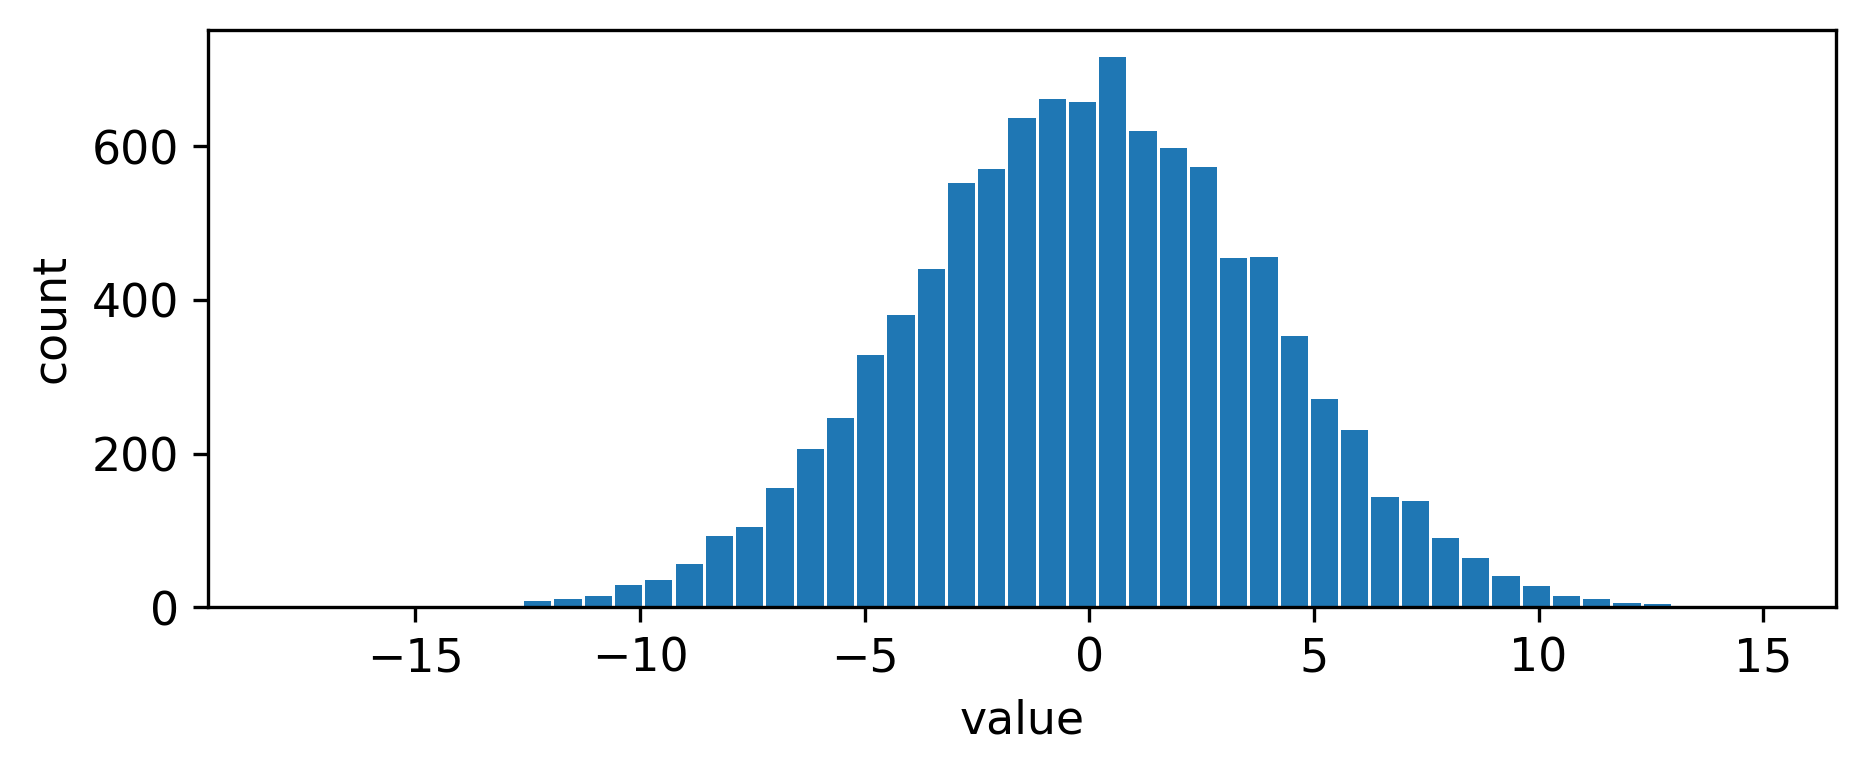

In [5]:
bins = np.linspace(-18, 15, 50)
hist, edges = np.histogram(X, bins = bins)
x = (edges[1:]+edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots()
ax.bar(x, hist, width = width *0.9)
ax.set_xlabel('value')
ax.set_ylabel('count')

## 3. Compute the cumulative average of X for each index. Store the result in an array.

In [6]:
i = np.linspace(1, X.size, X.size)
X_cum_avg = X.cumsum()/i
#X_cum_avg

## 4. compute the cumulative standard error of X.

In [7]:
#cumulative standard deviation
X_cum_std =[X[:element].std() for element in range(1,len(X)+1)]
#X_cum_std

## 5. Compute the values of the distribution mean and median

In [8]:
print(X.mean())
print(np.median(X))

-0.033939215614111264
-0.01831070759699021


## 6.-12. Plot the cumulative mean and cummulative median for the Gaussian distribution. Sample N=10,000 data points from the Pareto and Log-Normal distribution. Calculate the mean and median for both and repeat the plots for both.

#### Define a function to compute the disribution mean and median and to do the three plots 

In [13]:
def exercise3_GPT(X, x_log, y_log, bar_hist):
#pass array X and x_log and y_log boolean. bar_hist specifies whether the histogram is a bar plot (True) or a line plot (False)
    
    # 1. Create histogram
    bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), 50)
    if x_log:
        bins = np.logspace(0, np.log10(math.ceil(max(X))), 50)
    hist, edges = np.histogram(X, bins = bins, density = True)
    x = (edges[1:]+edges[:-1])/2
    width = bins[1]-bins[0]

    fig, ax = plt.subplots()
    if bar_hist:
        ax.bar(x, hist, width = width *0.9)
    else:
        ax.plot(x, hist, marker = '.')

    ax.set_xlabel('value')
    ax.set_ylabel('Probability distribution')
    if x_log:
        ax.set_xscale('log')
        
        
    #calculate cumulative mean                       
    i = np.linspace(1, X.size, X.size)
    X_cum_avg = X.cumsum()/i
    #calculate cumulative standard deviation (this might not be needed actually but to time to double-check)
    X_cum_std =[X[:element].std() for element in range(1,len(X)+1)]
    #calculate cumulative standard deviation
    X_cum_median =[np.median(X[:element]) for element in range(1,len(X)+1)]
    
    print('mean:' + str(X.mean()))
    print('median:' + str(np.median(X)))
    
    
    #6. Plot cumulative mean
    plt.figure()
    plt.errorbar(x = range(X_cum_avg.size), y = X_cum_avg, yerr=X_cum_std, capsize=0, ecolor='aliceblue', linestyle='')
    plt.plot(X_cum_avg, linewidth=2, color='tab:blue')
    plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1) # add mean line
    plt.xlabel("Number of observation")
    plt.ylabel("Cumulative mean")
    if y_log:
        plt.yscale("log")    
        
    
    #8. Plot cumulative median
    plt.figure()
    plt.plot(X_cum_median)
    plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1) # add mean line
    plt.xlabel("Number of observation")
    plt.ylabel("Cumulative median")
    if y_log:
        plt.yscale("log")

#### Normal/Gaussion distribution

mean:-0.033939215614111264
median:-0.01831070759699021


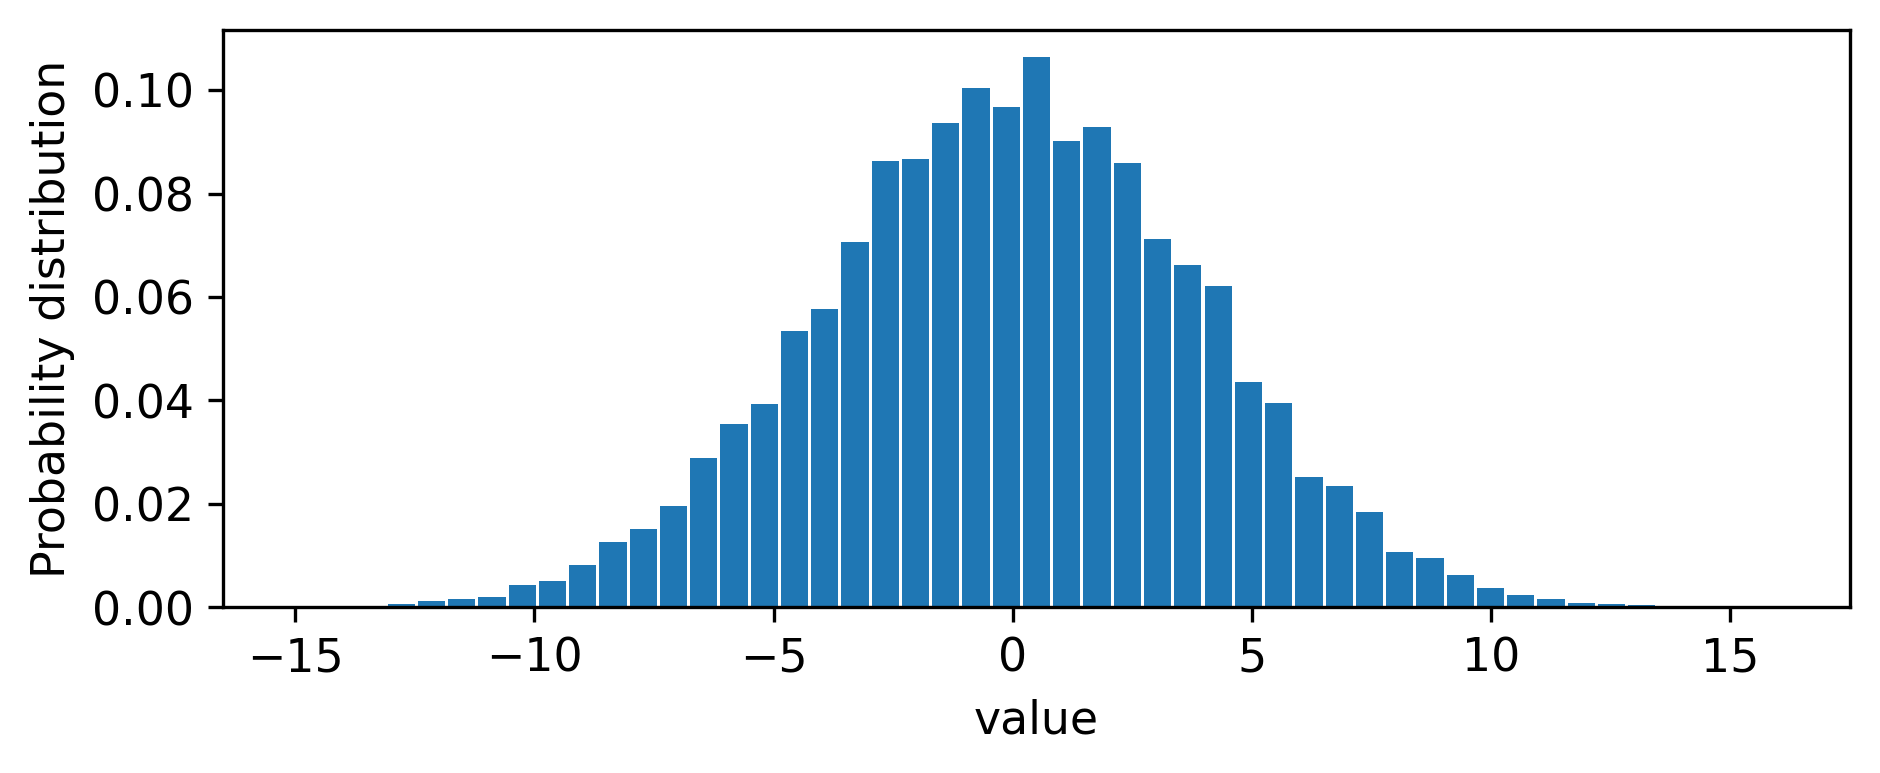

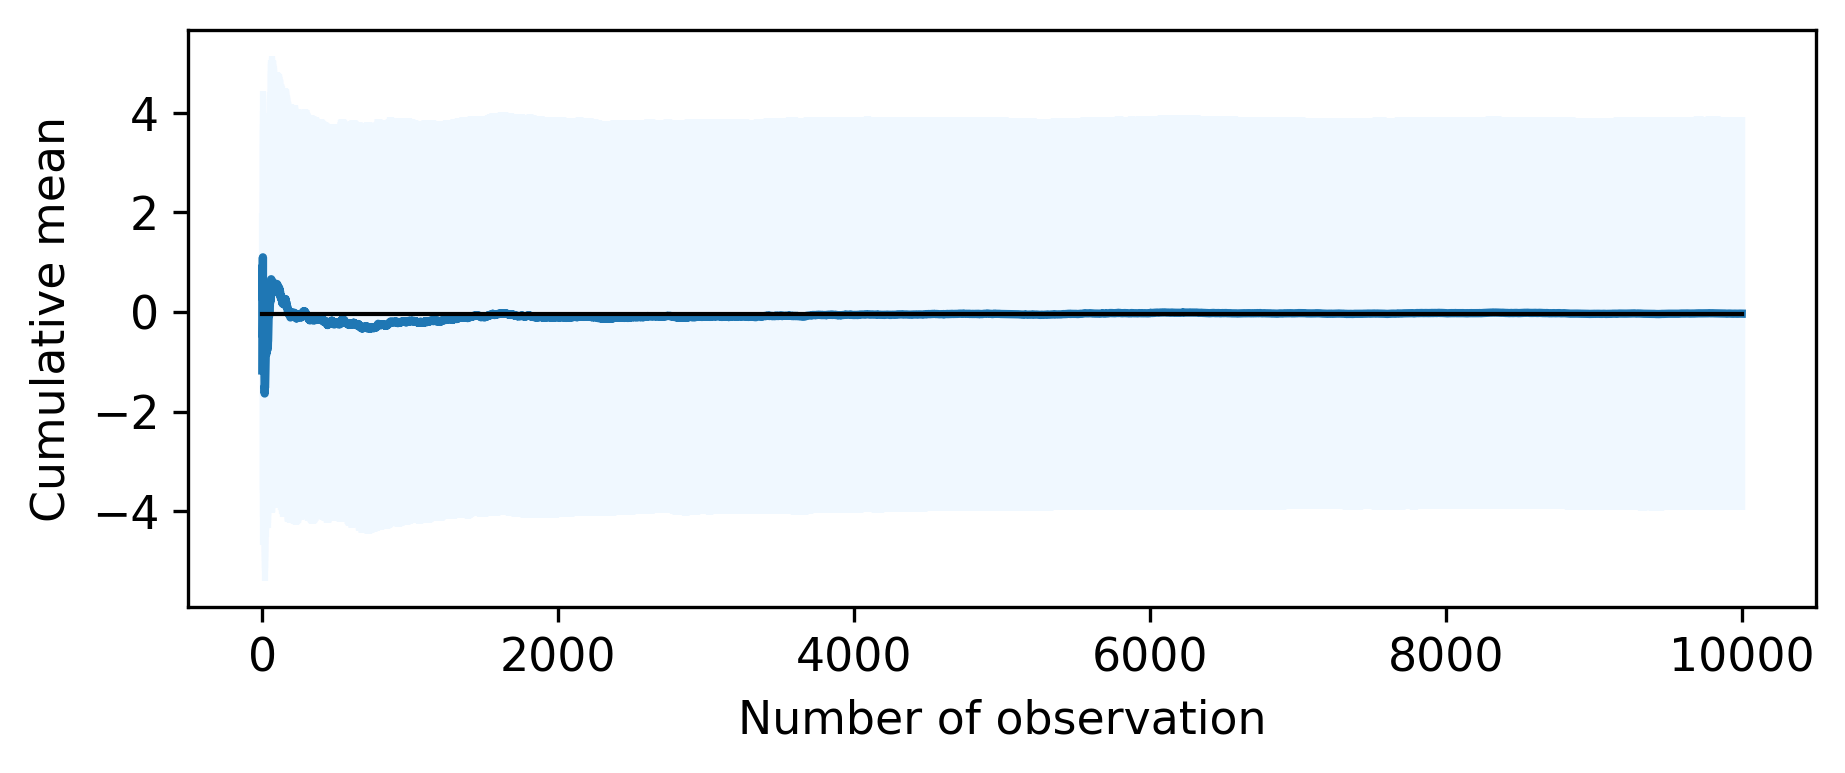

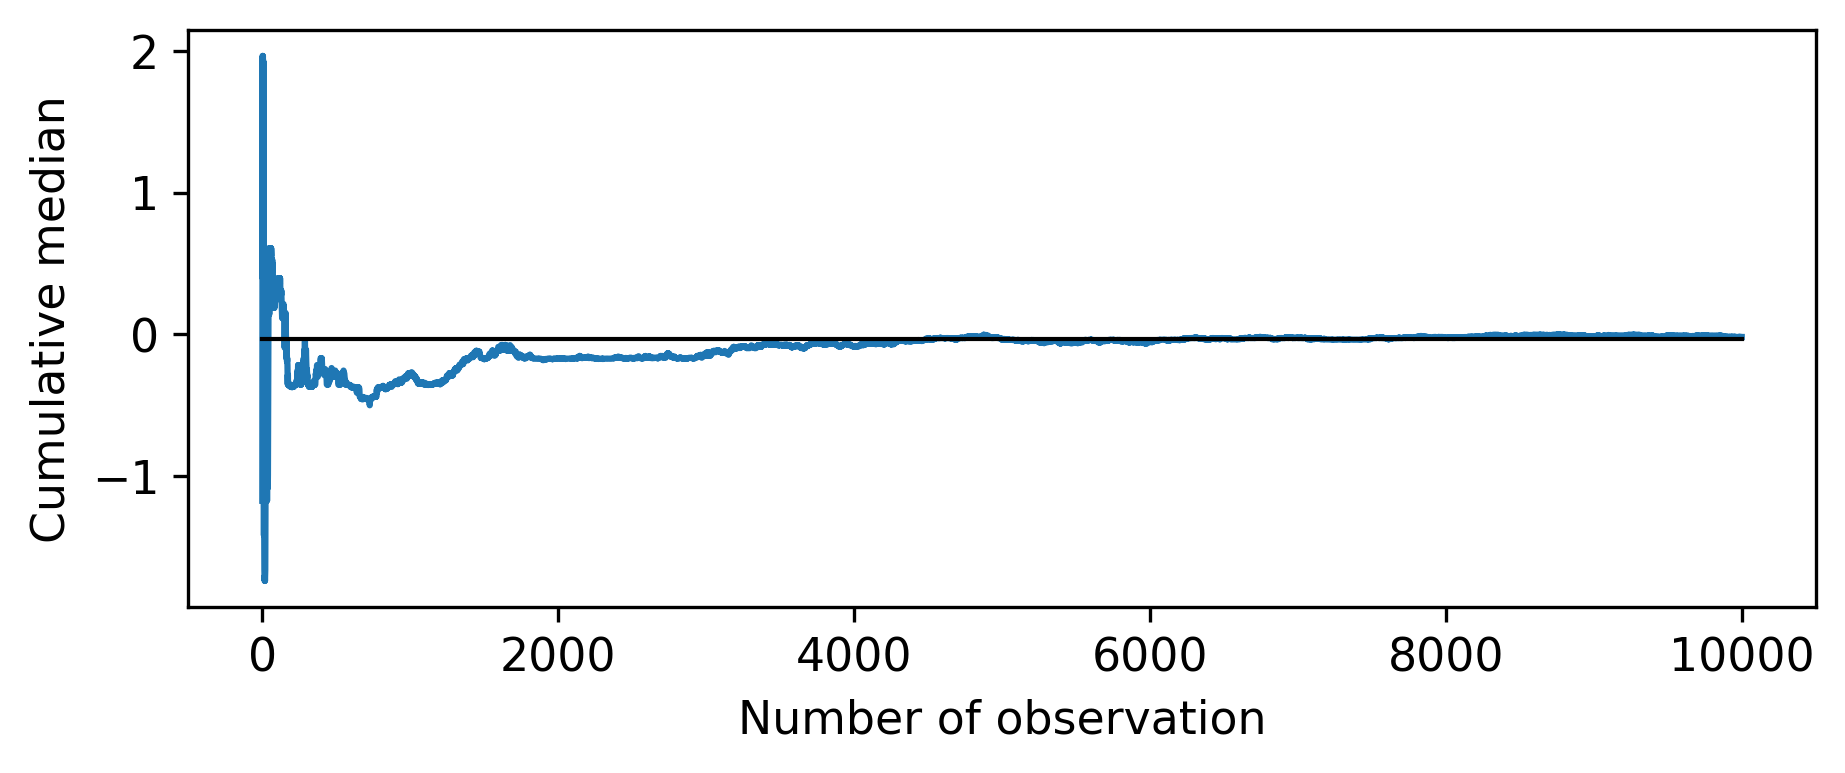

In [14]:
exercise3_GPT(X, x_log = False, y_log = False, bar_hist = True)

#### Pareto distribution

mean:331667.27499169135
median:4.316306897519796


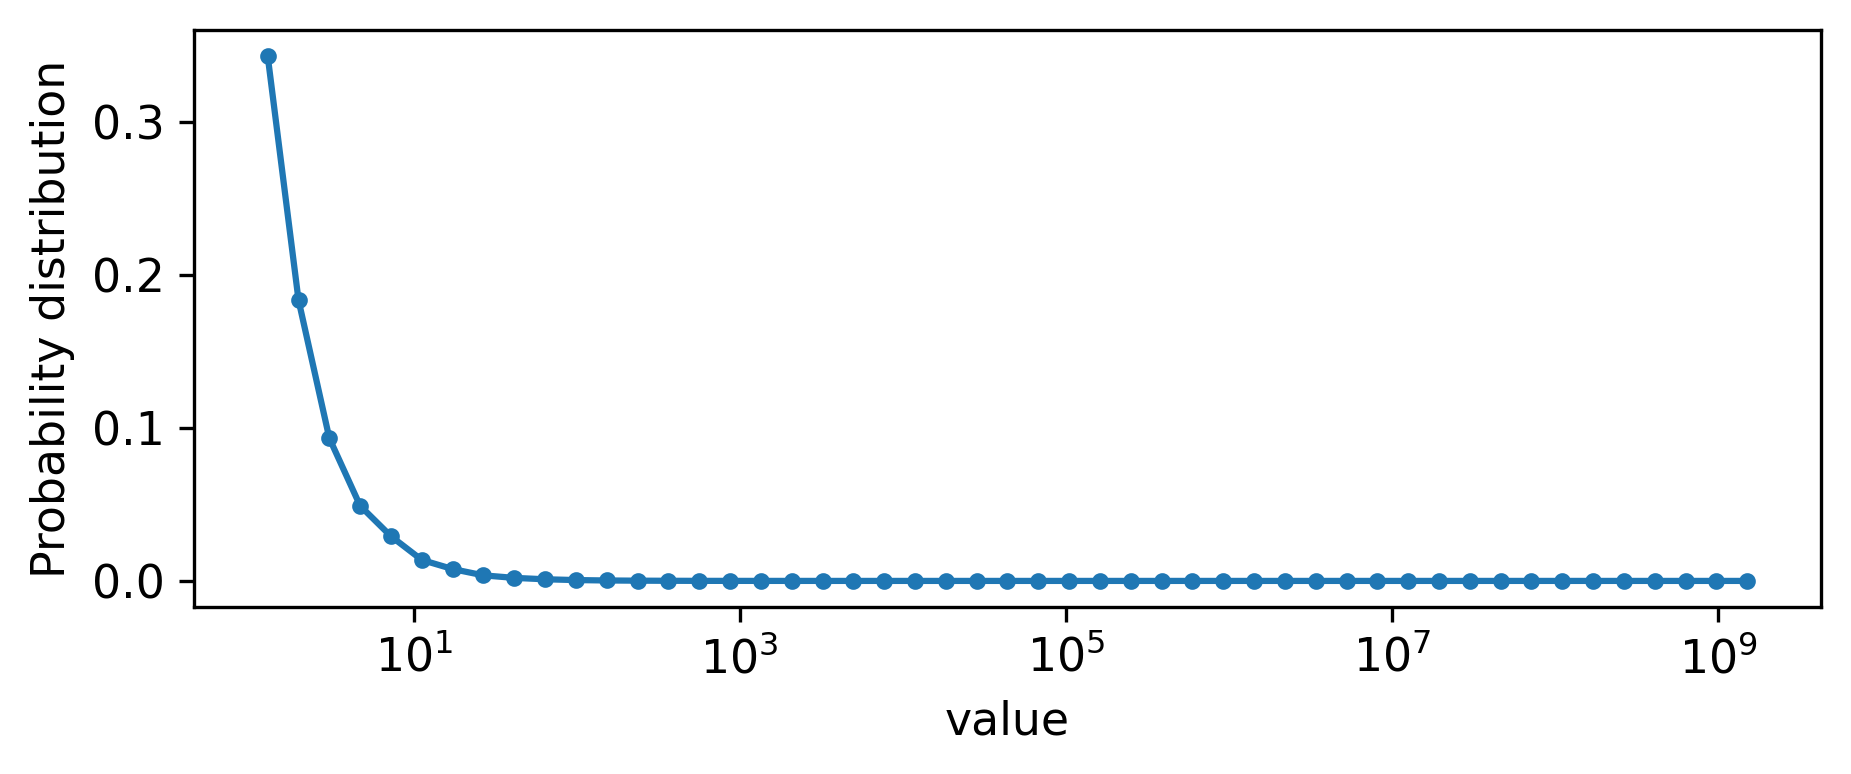

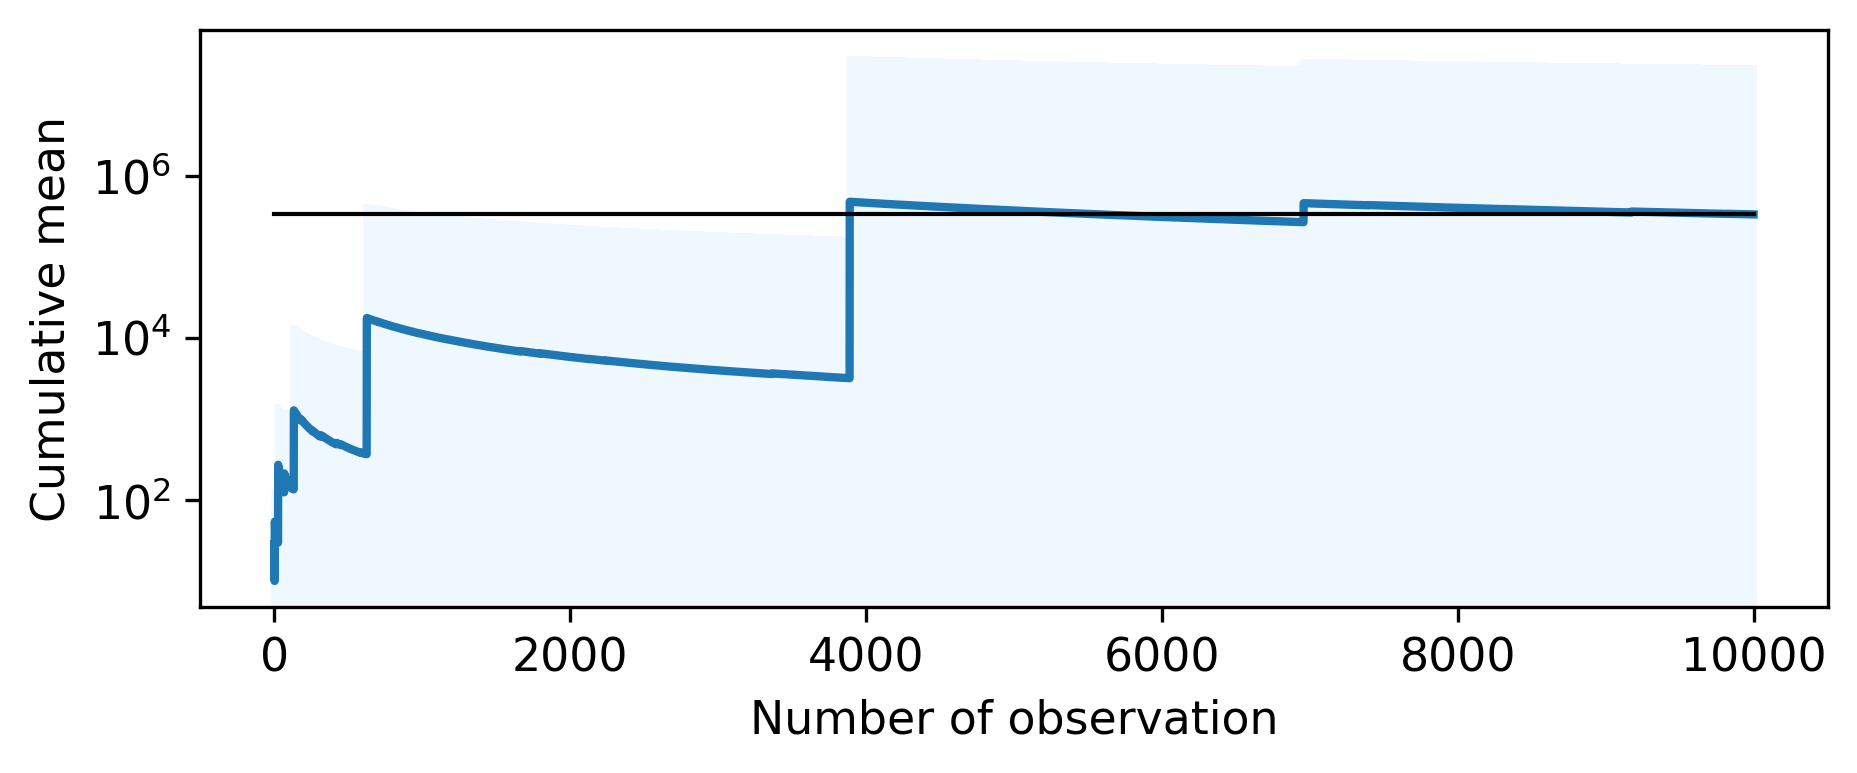

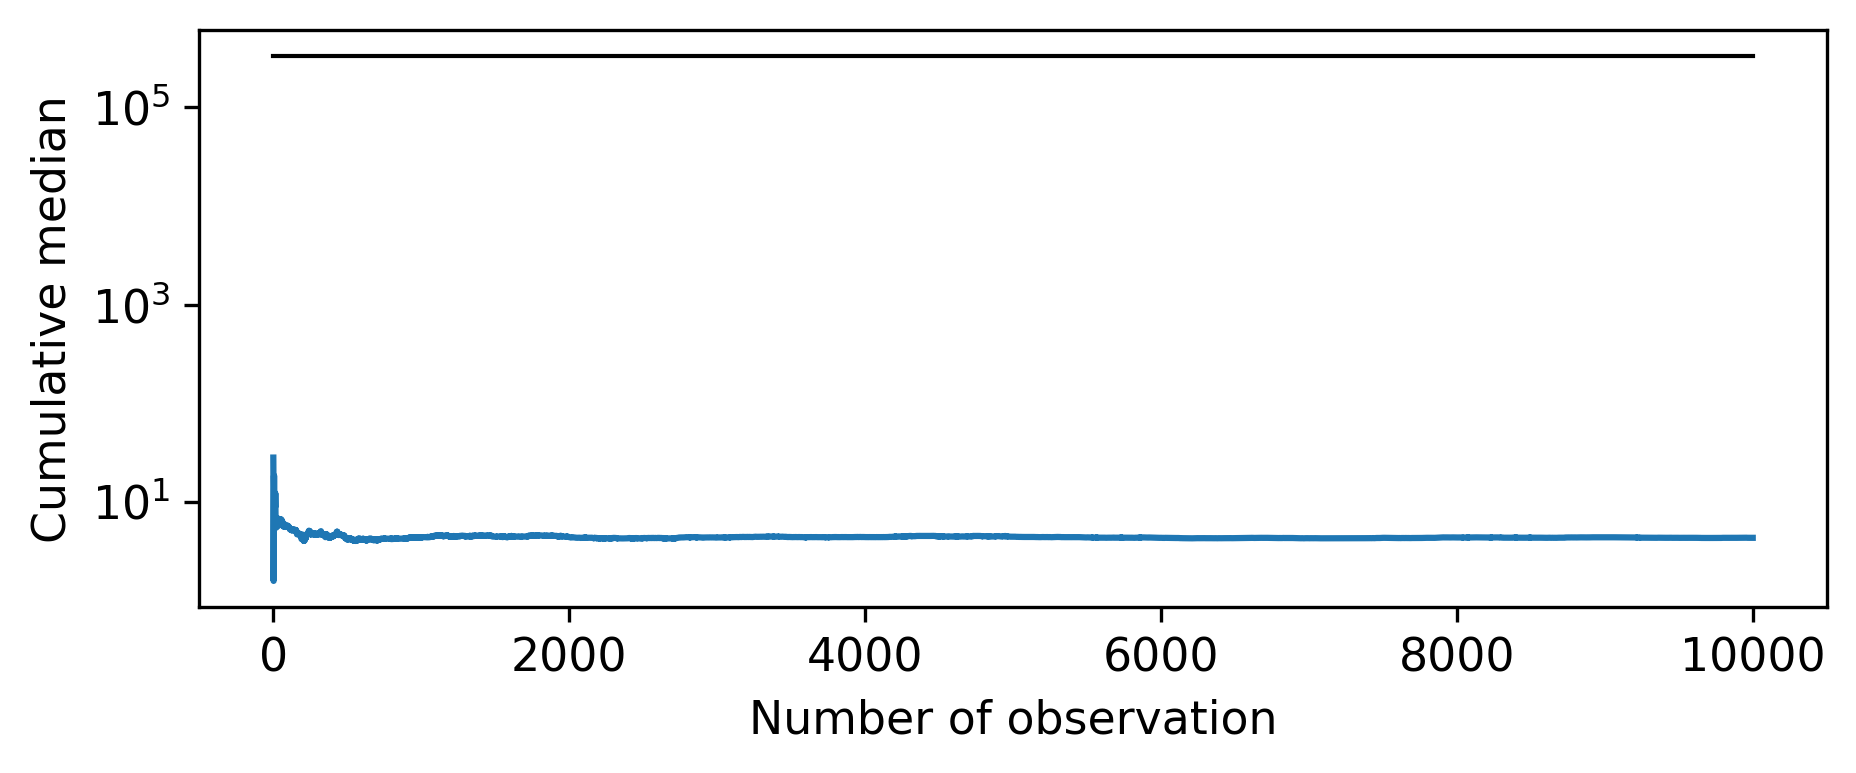

In [17]:
a, m = 0.5, 1  # shape and mode
X_pareto = (np.random.pareto(a, 10000) + 1) * m
#X_pareto
exercise3_GPT(X_pareto, x_log = True, y_log = True, bar_hist = False)

#### Log-Normal distribution

mean:1306.2491833066904
median:1.0172200545247114


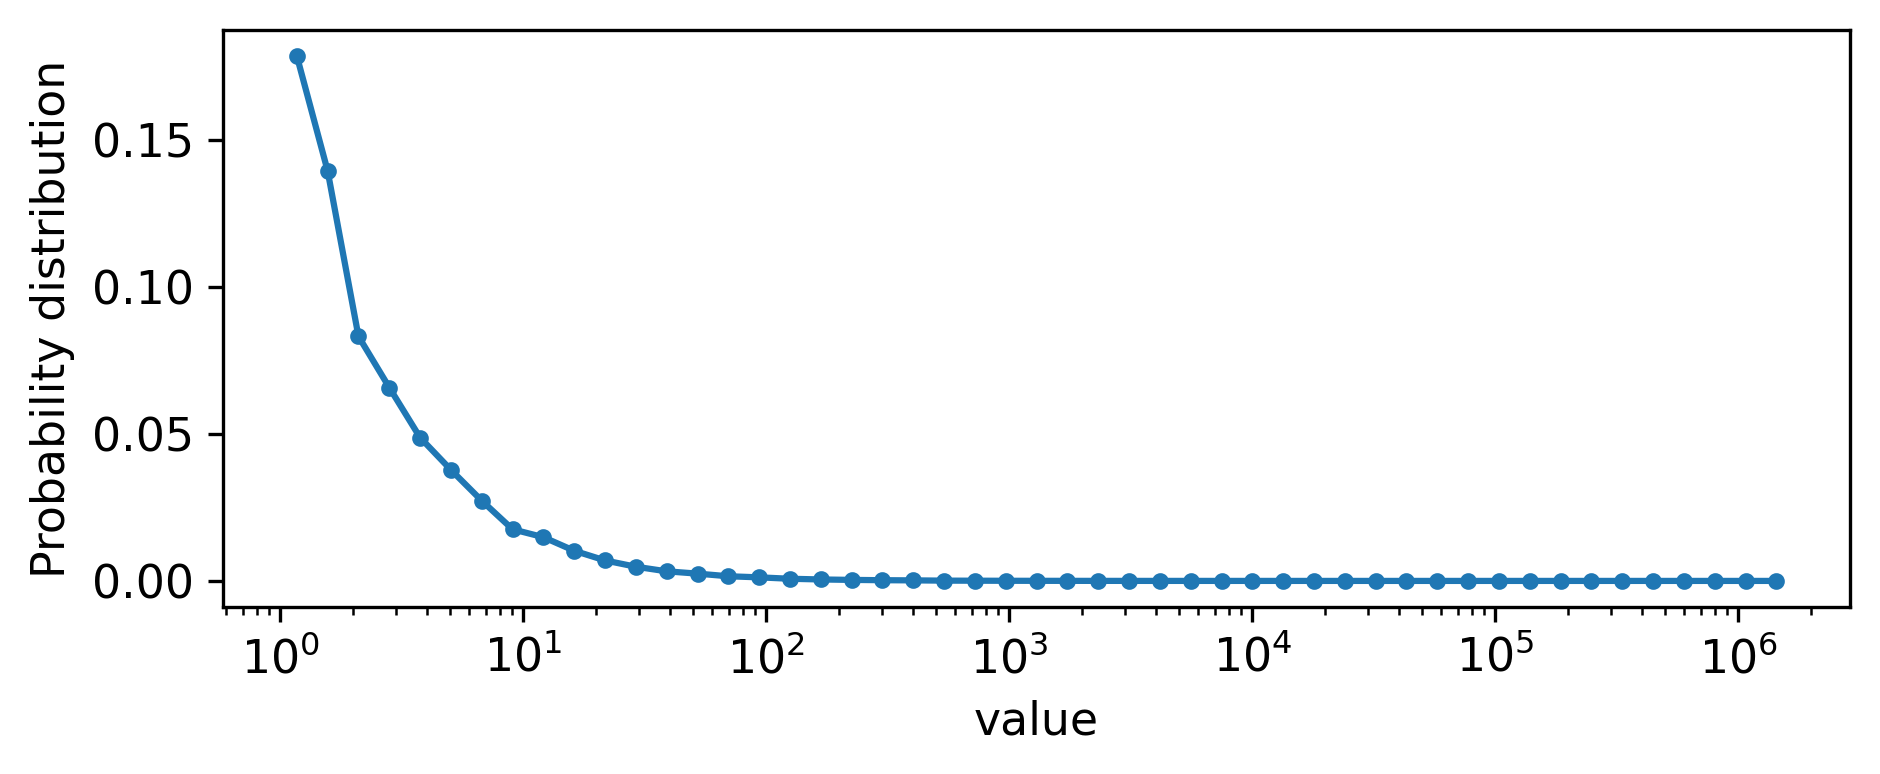

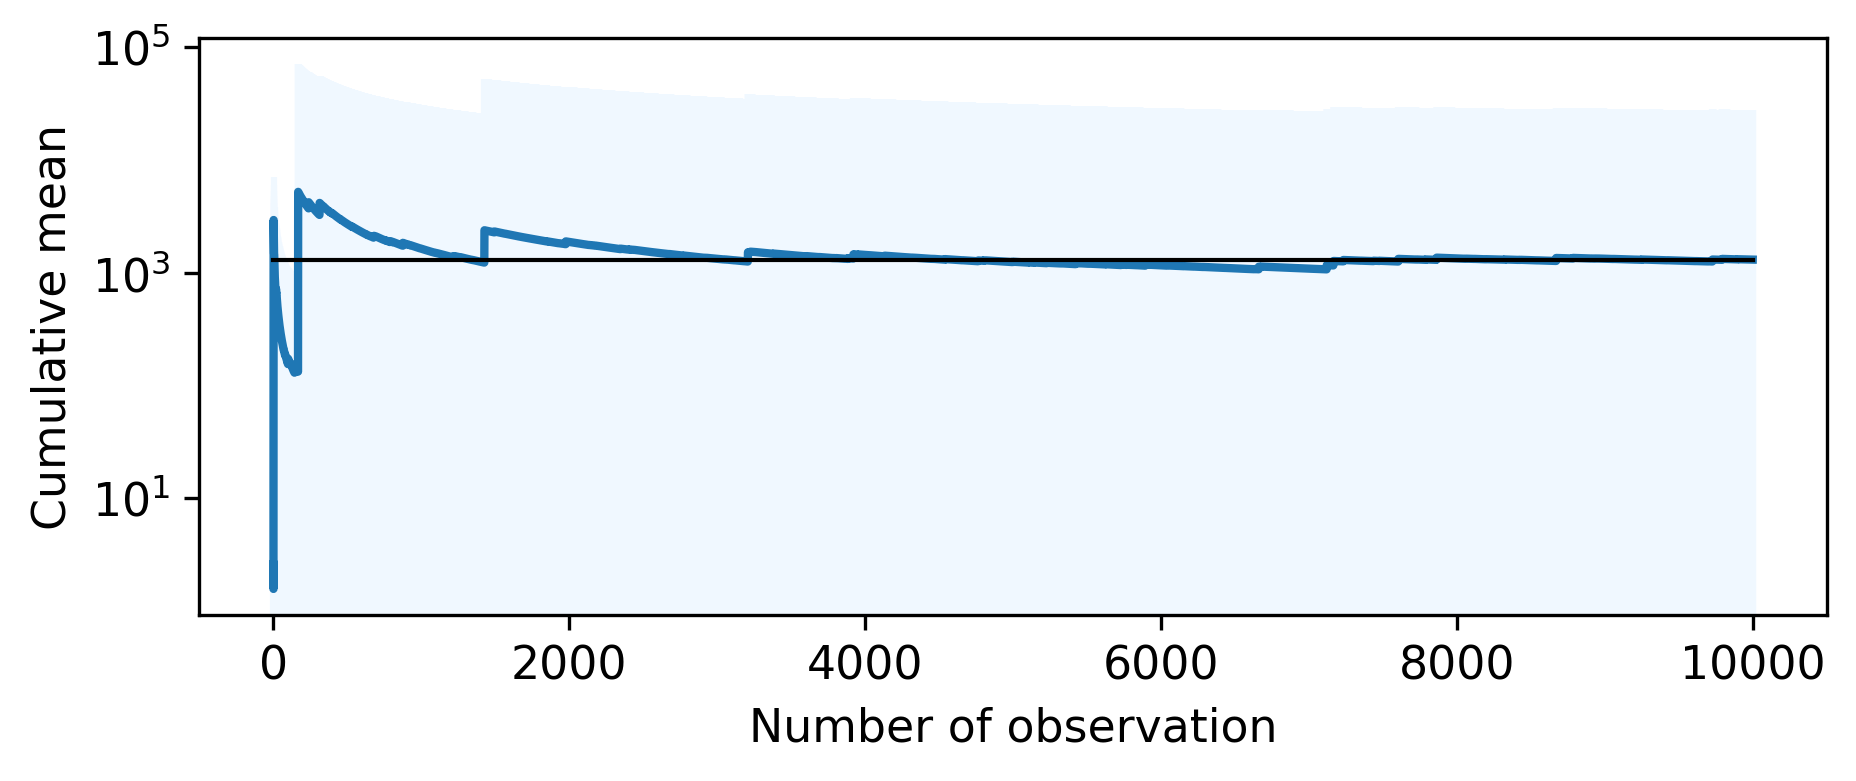

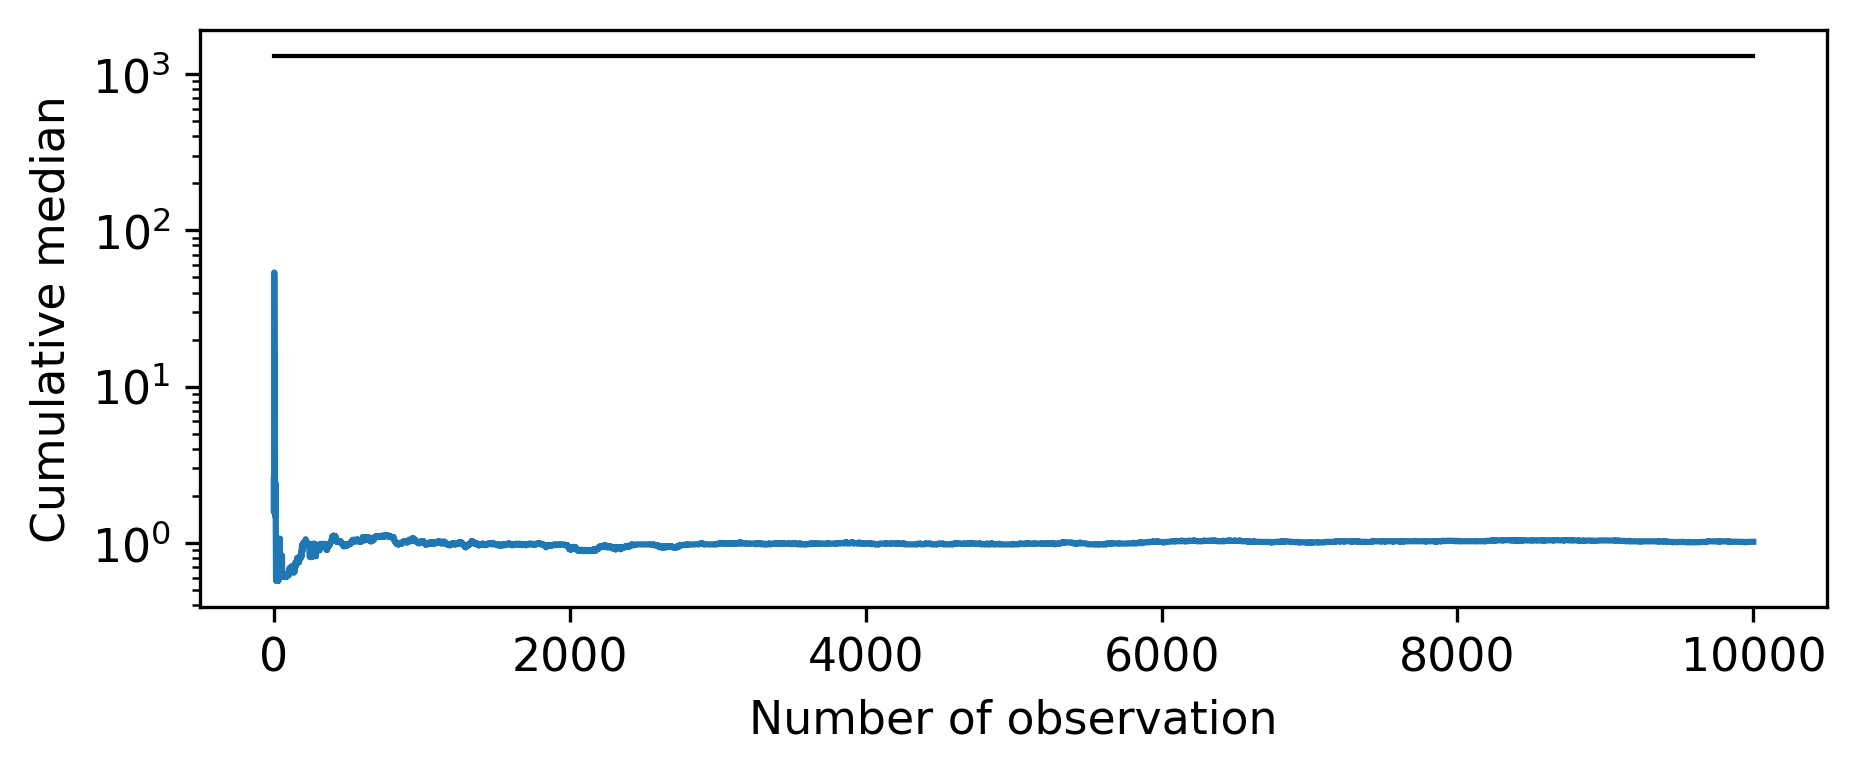

In [18]:
mu, sigma = 0, 4 # mean and standard deviation
X_logNorm = np.random.lognormal(mu, sigma, 10000)
#X_logNorm
exercise3_GPT(X_logNorm, x_log = True, y_log = True, bar_hist = False)

## 13. Compute mean and median for the citations of papers from 2019. Then, extract a random sample of N=10,000 papers.

In [65]:
#read the "small-sized author dataset in. It was created and stored in previous code"
citation_df = pd.read_csv('Author.txt', sep=",")
X_citations = citation_df['citationCount']
X_citations = X_citations.fillna(0) #replace nan values with zero
X_citations = X_citations.to_numpy()
X_citations = np.float64(X_citations)

print('mean = ' + str(X_citations.mean()))
print('median = ' + str(np.median(X_citations)))


mean = 500.08040201005025
median = 0.0


## 14. Repeat steps 2.-8. for the paper citation sample prepared in 13. 

mean:500.08040201005025
median:0.0


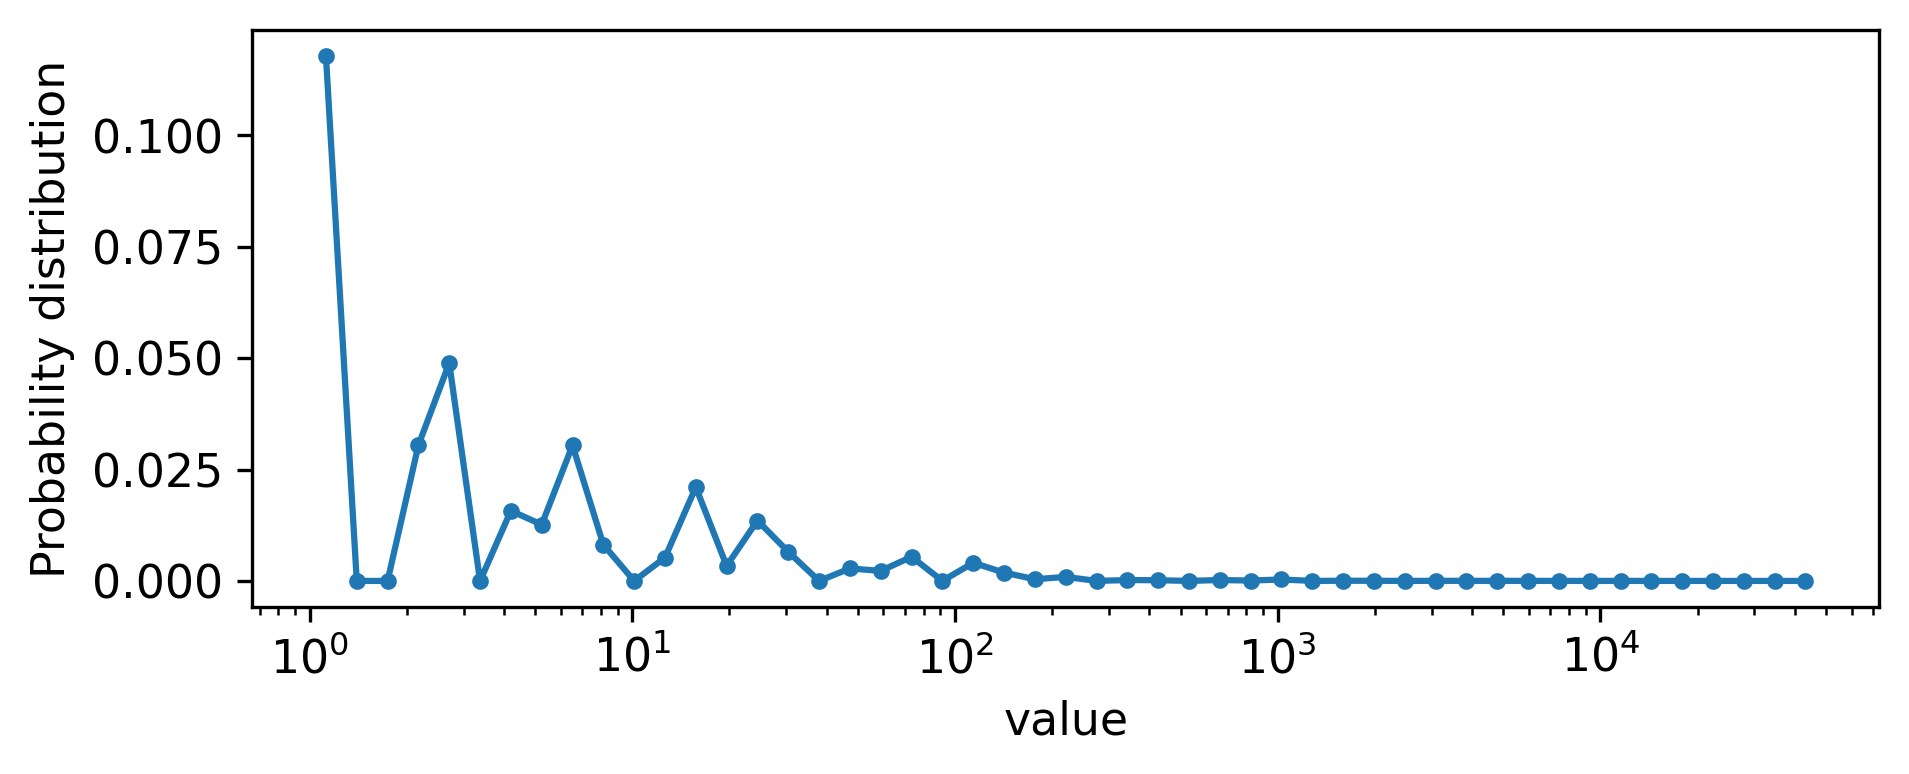

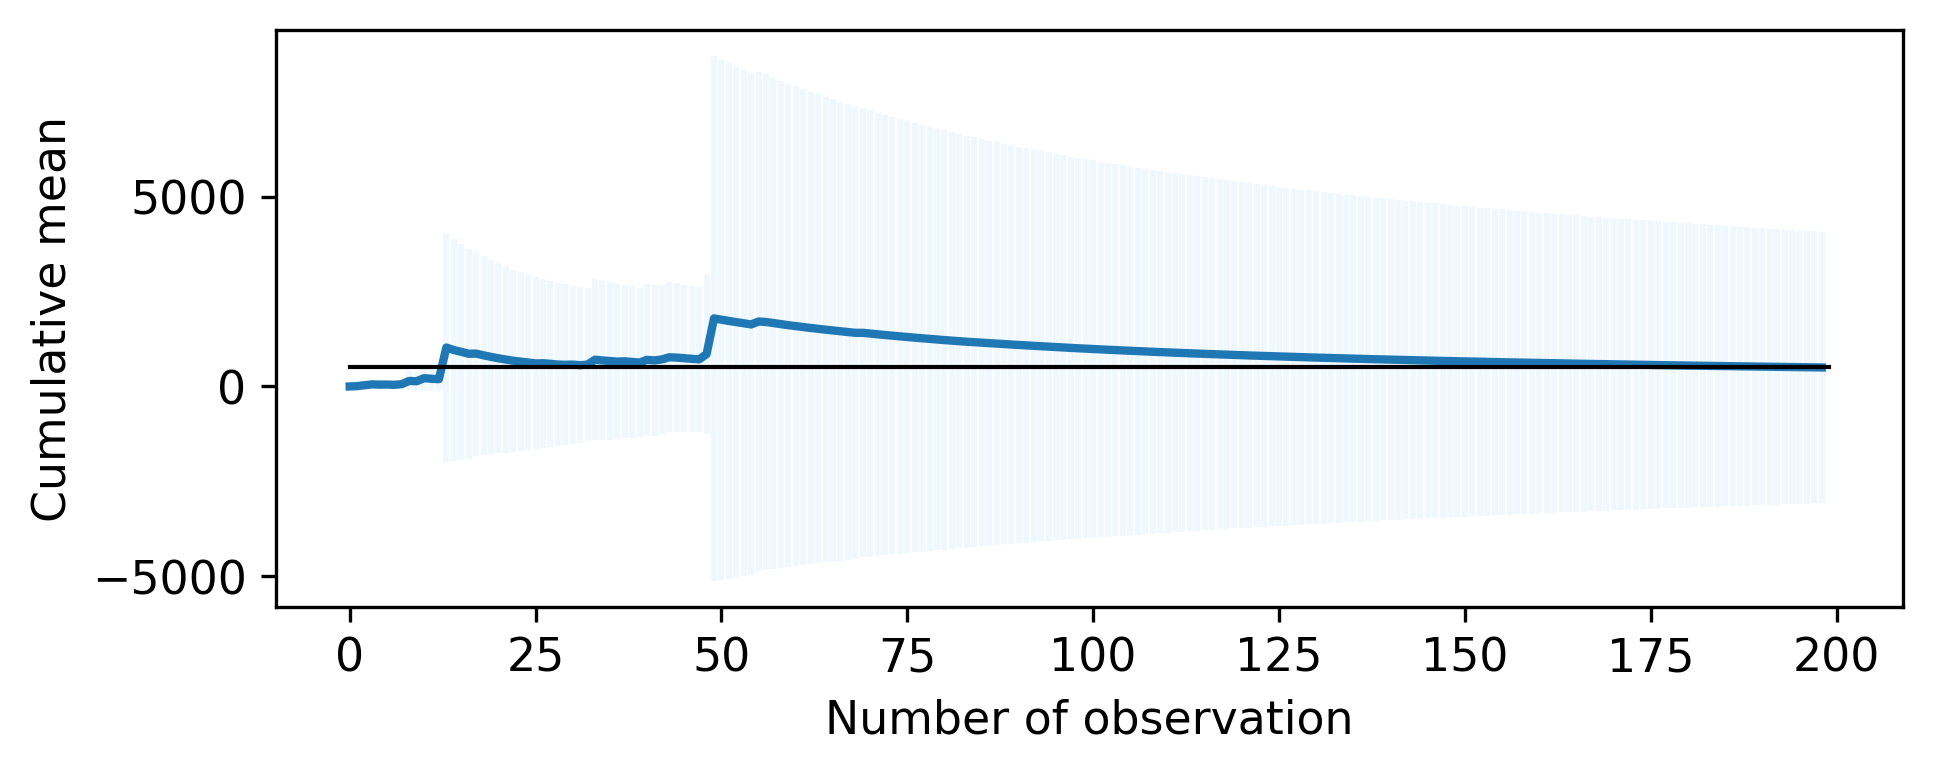

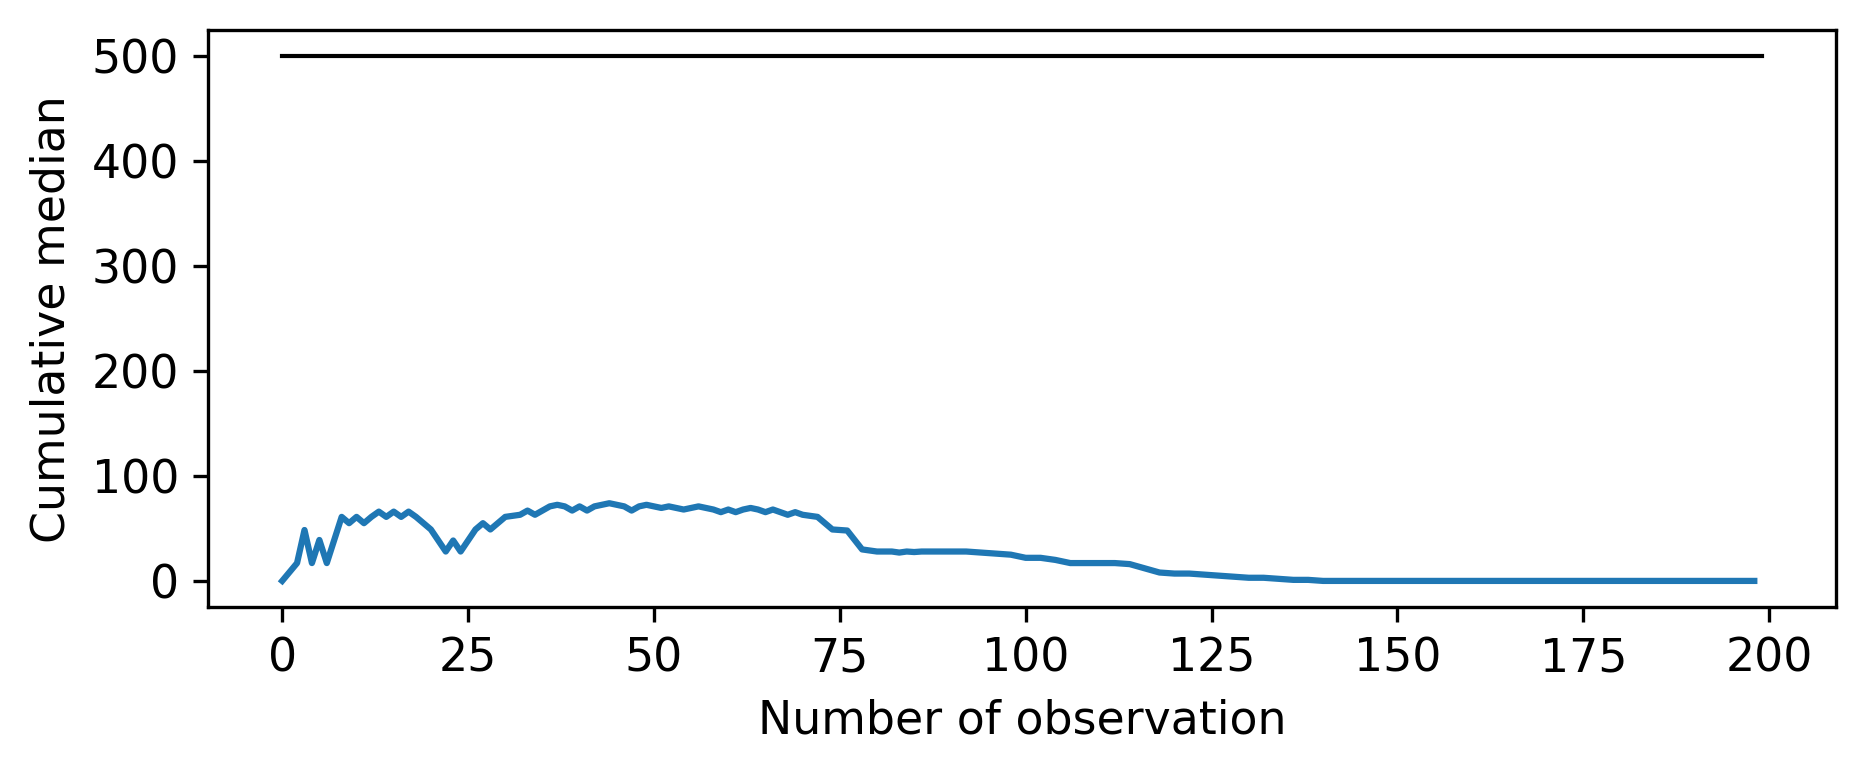

In [68]:
exercise3_GPT(X_citations, x_log = True, y_log = False, bar_hist = False)

## What did we learn :)

### Compare the evolution of cumulative average for the Gaussian, Pareto and LogNormal distribution

##### For our gaussian distribution the cumulative mean stays constant (=mu) after around 2000 observations. The heavy tailed distributions, however, can dramatically change their cumulative mean even after several thousand observations with just one new extreme observation drafted. These "extreme observations" are many orders of magnitude higher in the case of Pareto distribution or many orders of magnitude higher OR lower in the case of the logNorm distribution. This allows them to singlehandedly influence the mean so drastically. For N=10,000, the mean of the Pareto distribution is dominated by only one or two observations. For the LogNorm distribution, several observations have a significant influence on the mean.

### Compare the cumulative median vs cumulative average for the three distributions. Which statistics is more useful in different cases?

##### The cumulative median and mean are almost identical for the Gaussian distribution. This is because the Gaussian distribution is symmetric, meaning that the mean and median will be equal for N towards infinity. Both are useful measures. However, the mean can be used to describe the distribution and to draw new samples. Furthermore, the mean is used to calculate other important statistical measures such as the variance and standard deviation. 

##### For heavy tailed distributions, however, they are very different. The mean is influenced by outliers and is often not a good representation of the center of the distribution. The median is not influenced by these "extreme observations". Therefore, with our parameters, the median of both the Pareto and the LogNorm distribution stays around zero, while the mean is never "stillstanding" when drawing new samples. Therefore, the median is less sensitive to these outliers and provides a better representation of the typical value in the distribution.

### Which observations can be made concerning the citation count data plots? What are the implications?

##### The citation count data is heavy-tailed. We only looked at 200 authors due to limitations of the API. However, already here there is a large difference between mean and median. Some authors have more than 10^4 citations, while most authors (at least half) have zero citations. This has to be kept in mind when continuing to work with the data.

### What do you think are the take-home messages of this exercise?

##### - Getting a basic understanding of these three types of distributions (how means, medians, standard deviation behave with increasing sample size)

##### - Understanding the importance of outliers for heavy-tailed distributions

##### - It is important to know what underlying distribution our data has

##### - Different descriptive statistical properties have to be used when dealing with different distributions

##### - Heavy-tailed distributions are probably not as intuitively understood by human brains